# pH Recognition

## Importing Relevant Libraries

In [149]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

#Relevant Preprocessing Libraries
from sklearn.model_selection import train_test_split

#Relevant Evaluation Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [150]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Akshay\\Projects\\ph_recognition\\ph_recognition_dataset.csv')

## 1. Data Exploration

In [151]:
#Exploring Head Rows in the Dataset
data_raw.head(10)

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
5,29,214,148,5
6,0,181,76,6
7,13,156,0,7
8,92,166,0,8
9,184,191,0,9


In [152]:
#Exploring Tail Rows in the Dataset
data_raw.tail(10)

,blue,green,red,label
643,1,204,87,5
644,0,171,43,6
645,1,150,40,7
646,97,164,1,8
647,192,190,5,9
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13
652,131,2,77,14


In [153]:
#Exploring the Columns in the Dataset
data_raw.columns

Index(['blue', 'green', 'red', 'label'], dtype='object')

In [154]:
#Exploring the Data Types in the Dataset
data_raw.dtypes

blue     int64
green    int64
red      int64
label    int64
dtype: object

In [155]:
#Exploring the Shape of the Dataset
data_raw.shape

(653, 4)

In [156]:
#Exploring the Discrete Statistics of the Dataset
data_raw.describe(include = 'all')

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


### Observations:
1. Counts are equal for all the variables, hence not Missing Values.
2. All the RGB values lies within 0-255, hence no Outliers.
3. No unique values, hence no Dummy Values.
4. All values are distributed within 0-255, hence no Scaling necessary.

## 2. Feature Engineering

## 2.1. Binning

In [157]:
#Binning Label Variable into Acid or Base
bins = [-1, 6, 7, 14]
labels = ['Acidic', 'Neutral', 'Basic']
data_raw['type'] = pd.cut(data_raw['label'], bins, labels=labels)

## 3. Data Visualization

### Type; Countplot

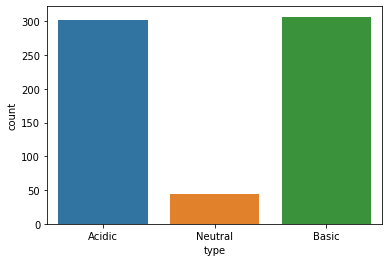

In [158]:
#Countplot for Type
sns.countplot(x=data_raw['type'])

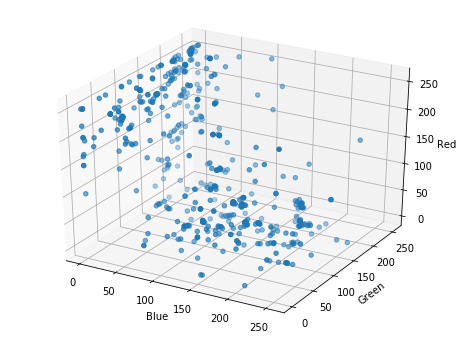

In [159]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

xs = data_raw['blue']
ys = data_raw['green']
zs = data_raw['red']

ax.scatter(xs,ys,zs, label=data['type'], cmap='virdis')

ax.set_xlabel('Blue')
ax.set_ylabel('Green')
ax.set_zlabel('Red')

plt.show()

## 4. Model Preparation

## 4.1. Preparing Data

In [160]:
#Dropping unnecessary variables
data = data_raw.drop(['label'], axis=1)

In [161]:
#Mapping Types into Numerical Values
type_mapping = {'Acidic':0, 'Neutral':1, 'Basic':2}
data['type'] = data['type'].map(types_mapping)

In [162]:
data.describe(include='all')

,blue,green,red,type
count,653.000000,653.000000,653.000000,653.0
unique,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,307.0
mean,89.290965,130.094946,120.655436,NaN
std,74.974850,72.487085,89.581264,NaN
min,0.000000,0.000000,0.000000,NaN
25%,22.000000,68.000000,52.000000,NaN
50%,67.000000,146.000000,90.000000,NaN
75%,162.000000,189.000000,224.000000,NaN


## 4.2. Describing Targets and Features

In [163]:
#Describing Type as Targets
targets = data['type']
#Describing other variables than class as Features
features = data.drop(['type'], axis=1)

## 4.3. Splitting Data

In [171]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=420)

## 5. Testing Models
1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree Classifier
4. Random Forest Classifier
5. KNN or K-Nearest Neighbors Classifier
6. Gradient Boosting Classifier
7. Stochastic Gradient Descent Classifier
8. Perceptron
9. Support Vector Classifier

### 5.1. Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_logreg

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


90.84

### 5.2. Gaussian Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(x_train, y_train)

y_pred = gaussian.predict(x_test)

acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_gaussian

89.31

### 5.3. Decision Tree Classifier

In [179]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()

decisiontree.fit(x_train, y_train)

y_pred = decisiontree.predict(x_test)

acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_decisiontree

92.37

### 5.4. Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

randomforest.fit(x_train, y_train)

acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_randomforest

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


92.37

### 5.5. KNN or K-Nearest Neighbors Classifier

In [182]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_knn

96.18

### 5.6. Gradient Boosting Classifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)

acc_gbc = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_gbc

94.66

### 5.7. Stochastic Gradient Descent Classifier

In [184]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

sgdc.fit(x_train, y_train)

y_pred = sgdc.predict(x_test)

acc_sgdc = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_sgdc

85.5

### 5.8. Perceptron

In [185]:
from sklearn.linear_model import Perceptron

percep = Perceptron()

percep.fit(x_train, y_train)

y_pred = percep.predict(x_test)

acc_percep = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_percep

90.84

### 5.9. Support Vector Machines

In [187]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_svc

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


70.23

In [188]:
models = pd.DataFrame({'Model':['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN or K-Nearest Neighbors Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Descent Classifier', 'Perceptron', 'Support Vector Classifeir'], 'Score':[acc_logreg, acc_gaussian, acc_decisiontree, acc_randomforest, acc_knn, acc_gbc, acc_sgdc, acc_percep, acc_svc]})

In [189]:
models.sort_values(by='Score', ascending=False)

,Model,Score
4,KNN or K-Nearest Neighbors Classifier,96.18
5,Gradient Boosting Classifier,94.66
2,Decision Tree Classifier,92.37
3,Random Forest Classifier,92.37
0,Logistic Regression,90.84
7,Perceptron,90.84
1,Gaussian Naive Bayes,89.31
6,Stochastic Gradient Descent Classifier,85.50
8,Support Vector Classifeir,70.23
